# Exercise 2 - image classification
이세진 20161619

해당 jupyter notebook 파일을 google doc 에 올림.
![title](img/googledoc.png) 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# this is for the future when these variables get updated 

In [0]:
! pip install fastai
from fastai.vision import *
from fastai.metrics import error_rate
# download fast ai library and importing them 

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [0]:
help(untar_data)
# help function describes what the function does , the provider, parameters, etc

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
path = untar_data(URLs.PETS); path
# untar data function downloads the file from the URL and extracts the data. and it is stored in path variable 

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()
#list the sub-path

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'
# path to annotation and path to image are stored in corresponding variable 

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

In [0]:
fnames = get_image_files(path_img) # one image folder with the images  
fnames[:5] # print lists of file names 

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_112.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_61.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_77.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_17.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_193.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$' # direct expression to extract the labels from the text

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)
# extracting the image from image path using the direct expression and returns data bunch object.
# data bunch object contains training data and test data, each with labels  
# image size needs to be same size, which is 224 * 224  in most of the time
# normalize function is used to normalize the pixel values of the images. (RGB values to be 0-1) 

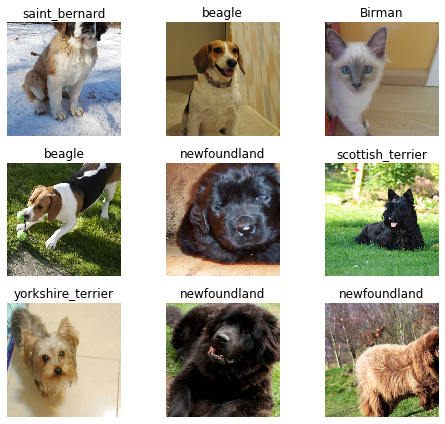

In [0]:
data.show_batch(rows=3, figsize=(7,6))
# function used to show the data

In [0]:
print(data.classes) # print all the possible categories 
len(data.classes),data.c # the length of the possible categories(classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs)
We will train for 4 epochs (4 cycles through all our data).

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate) 
# create a convolutional learner, by passing the data and the architecture type 
# in this code, it uses resnet 34 type, which works very well in most of the time
# the other type is resnet50, which is bigger. we chose resnet34 because it will train faster
# third parameter means you want to print out the error rate 
# downloads pre-trained model if it exists 

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.model
learn.fit_one_cycle(4)
# take pretrained model and fit it to our data 
# this allows us to create a model with few data 
# the parameter, 4 means model will be trained for 4 epochs 

epoch,train_loss,valid_loss,error_rate,time
0,1.389686,0.295939,0.092693,01:28
1,0.624507,0.246999,0.085250,01:28
2,0.386344,0.228977,0.074425,01:28
3,0.289564,0.213269,0.066306,01:27


In [0]:
learn.save('stage-1')
# saving the coefficients and weights the model created  

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
# get the classification interpretation object from learner, which will show the results of the cnn 

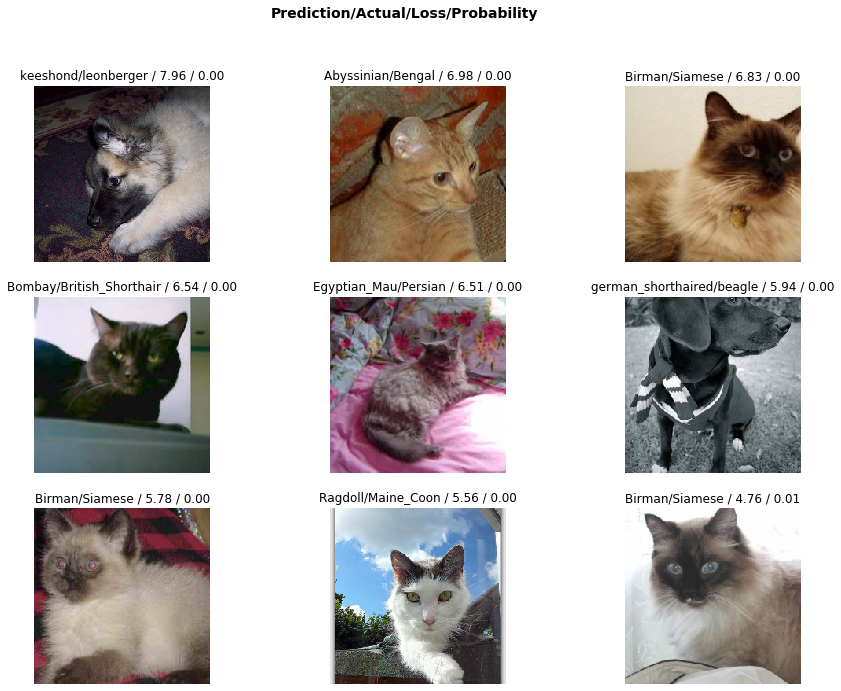

In [0]:
interp.plot_top_losses(9, figsize=(15,11))
# display the categories that the model was most confused with one another 

In [0]:
doc(interp.plot_top_losses)
# show the documentation of the function, interp.plot_top_losses. you can also see the source of the function code
# this is your friend when you are struggling to use a function 

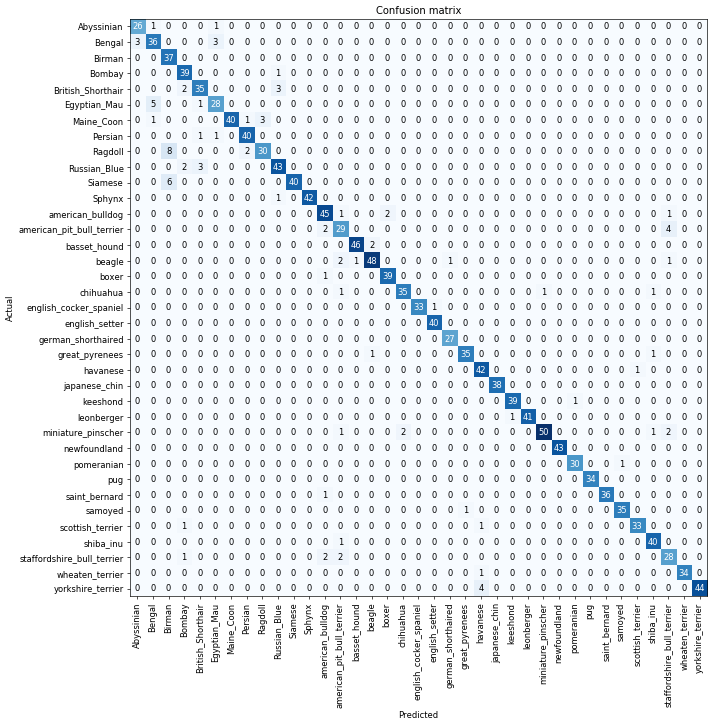

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
# makes a graph that shows which categories/classes are confused (made wrong predictions using the model)

In [0]:
interp.most_confused(min_val=2)
# displays the most confused categories 

[('Ragdoll', 'Birman', 8),
 ('Siamese', 'Birman', 6),
 ('Egyptian_Mau', 'Bengal', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('yorkshire_terrier', 'havanese', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Bengal', 'Egyptian_Mau', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('British_Shorthair', 'Bombay', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('american_bulldog', 'boxer', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'american_pit_bull_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('miniature_pinscher', 'staffordshire_bull_terrier', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [0]:
learn.unfreeze() 
# unfreeze the model so it can be trained more and weights can be updated 

In [0]:
learn.fit_one_cycle(1)
# train the model with epoch 1, and we can see that it gives much worse error rate

epoch,train_loss,valid_loss,error_rate,time
0,0.680963,0.362336,0.118403,01:29


In [0]:
learn.load('stage-1');
# load the saved weight from previous model 

In [0]:
learn.lr_find()
# learning rate finder 

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


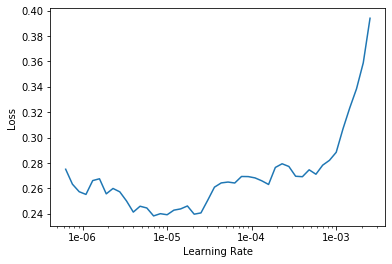

In [0]:
learn.recorder.plot()
# plot the result of learning rate finder 
# shows the change in loss as learning rate changes with a graph 

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))
# train the first layer with learning rate of 1e-6 and train the last layer with learning rate of 1e-4.
# and distribute other layers with learning rate within the range 

epoch,train_loss,valid_loss,error_rate,time
0,0.240211,0.197767,0.061570,01:27
1,0.221658,0.195479,0.060217,01:28


That's a pretty accurate model!

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)
## bs means batch size which means how many images will be trained in each time 

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
## exact same thing but with resnet 50, which is a bigger model with 50 layers 
# it will return error because u run out of gpu ram memory 

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


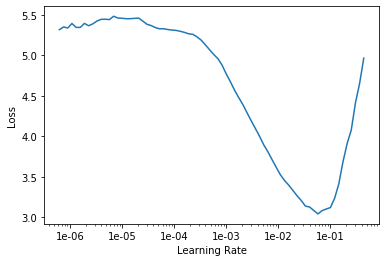

In [0]:
learn.lr_find()
learn.recorder.plot()
# find the learning rate and plot it 

In [0]:
learn.fit_one_cycle(5)
## train the model with 5 epochs

epoch,train_loss,valid_loss,error_rate,time
0,0.712373,0.314244,0.094046,02:14
1,0.481138,0.269644,0.075778,02:16
2,0.319895,0.190703,0.062246,02:12
3,0.240318,0.152980,0.050068,02:11
4,0.157653,0.146241,0.045332,02:10


In [0]:
learn.save('stage-1-50')
# save the model, weights and coefficients 

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.140388,0.139718,0.044655,02:21
1,0.123778,0.143883,0.043978,02:20
2,0.103588,0.145353,0.041272,02:21


If it doesn't, you can always go back to your previous model.

In [0]:
learn.load('stage-1-50');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 6),
 ('Ragdoll', 'Birman', 6),
 ('miniature_pinscher', 'chihuahua', 4),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('yorkshire_terrier', 'havanese', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('boxer', 'american_bulldog', 3),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('samoyed', 'great_pyrenees', 2)]

## Other data formats

In [0]:
path = untar_data(URLs.MNIST_SAMPLE); path
# download mnist sample data and store in path 

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
tfms = get_transforms(do_flip=False)
# returns a tuple of two lists of transforms: one for the training set and one for the validation set
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)
# returns the image data from the folder in the path 

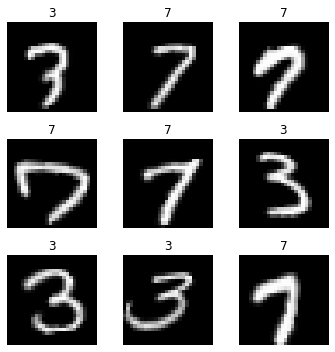

In [0]:
data.show_batch(rows=3, figsize=(5,5))
# display the mnist image data 

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)
# make the cnn learner and fit it to the model 

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.193850,0.089086,0.968106,00:17
1,0.117882,0.051833,0.984298,00:17


In [0]:
df = pd.read_csv(path/'labels.csv')
df.head()
# read the csv file and 

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)
# returns image data bunch object from csv file 

[0, 1]

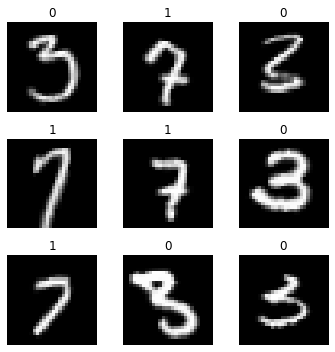

In [0]:
data.show_batch(rows=3, figsize=(5,5))
data.classes
# displays the data classes

In [0]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [0]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [0]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes
# extracts the labels using direct expression

['3', '7']

In [0]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes
# extracts the labels using the function 

['3', '7']

In [0]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]
# extracts the labels using if statement 

['3', '3', '3', '3', '3']

In [0]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']